In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_16_PCA'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_16_PCA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [82]:
df = pd.read_excel('Iris.xls')
X, y = df.drop(columns=['iris']), df['iris']
X['petallength'] = X['petallength']
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
from sklearn.decomposition import PCA
n = 2
pca = PCA(n)
pca.fit(X)

X_pca = pd.DataFrame(pca.transform(X), columns=['PC_{}'.format(x) for x in range(1, n+1)])
X_pca.head()

,PC_1,PC_2
0,-1.286849,0.383436
1,-1.375810,-0.124280
2,-1.544061,-0.041714
3,-1.602075,-0.170610
4,-1.370193,0.424375


In [81]:
pca.components_[0]

array([ 0.72240694, -0.11103893,  0.15617602,  0.66438515])

In [78]:
pca.components_[1]

array([0.37231836, 0.92555649, 0.02109478, 0.06541577])

In [73]:
A = X@pca.components_.T
A

,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [74]:
A.values - X_pca.values

array([[ 0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00, -8.88178420e-16],
       [ 4.44089210e-16, -7.77156117e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00, -6.66133815e-16],
       [ 0.00000000e+00, -8.46545056e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [ 4.44089210e-16, -8.88178420e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00, -8.88178420e-16],
       [ 0.00000000e+00, -7.49400542e-16],
       [ 0.00000000e+00, -8.88178420e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00, -8.88178420e-16],
       [-4.44089210e-16, -4.44089210e-16],
       [ 0.00000000e+00, -6.66133815e-16],
       [ 0.00000000e+00, -7.77156117e-16],
       [-2.22044605e-16, -6.66133815e-16],
       [ 0.00000000e+00, -6.66133815e-16],
       [-2.22044605e-16, -8.32667268e-16],
       [ 0.00000000e+00, -6.66133815e-16],
       [ 0.00000000e+00, -9.43689571e-16],
       [ 0.

In [6]:
print('Total Explained variance ratio by {} components: {:.4f}'.format(n, np.sum(pca.explained_variance_ratio_)))

Total Explained variance ratio by 2 components: 0.9776


In [7]:
0.7277 + 0.2303

0.958

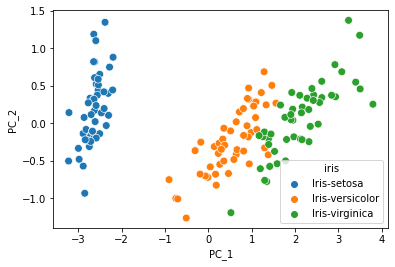

In [8]:
sb.scatterplot(data=X_pca, x='PC_1', y='PC_2', hue=y, s=60);

In [9]:
from sklearn.decomposition import FastICA
n = 2
ica = FastICA(n)
ica.fit(X)

X_ica = pd.DataFrame(ica.transform(X), columns=['ICA_{}'.format(x) for x in range(1, n+1)])
X_ica.head()

,ICA_1,ICA_2
0,0.044059,-0.111623
1,-0.038278,-0.105092
2,-0.033594,-0.112518
3,-0.061853,-0.104107
4,0.045105,-0.113499


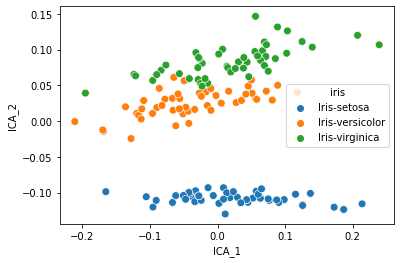

In [10]:
sb.scatterplot(data=X_ica, x='ICA_1', y='ICA_2', hue=y, s=60);

In [11]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [12]:
X_train = X_train.reshape(60000, 784)
X_train.shape
X_test = X_test.reshape(10000, 784)
X_test.shape

(10000, 784)

In [13]:
def svm_mnist(X_train, y_train, X_test, y_test, use_pca=False):
    from sklearn.svm import SVC
    import time
    tic = time.time()
    if use_pca:
        from sklearn.decomposition import PCA
        pca = PCA(use_pca)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    model = SVC()
    model.fit(X_train, y_train)
    print('Accuracy train: {:.4f}'.format(model.score(X_train, y_train)))
    toc_1 = time.time()
    print('Training time: {:.2f} seconds'.format(toc_1-tic))
    print('Accuracy test : {:.4f}'.format(model.score(X_test, y_test)))
    toc_2 = time.time()
    print('Predict time: {:.2f} seconds'.format(toc_2-toc_1))

In [14]:
svm_mnist(X_train, y_train, X_test, y_test, use_pca=False)

Accuracy train: 0.9899
Training time: 1773.85 seconds
Accuracy test : 0.9792
Predict time: 189.10 seconds


In [15]:
svm_mnist(X_train, y_train, X_test, y_test, use_pca=0.95)

Accuracy train: 0.9934
Training time: 458.42 seconds
Accuracy test : 0.9832
Predict time: 39.46 seconds
